# Student Score Prediction
### Predicting students' exam scores based on study-related factors

In [20]:
# Import libraries
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.metrics import mean_squared_error , r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [28]:
df.isnull().sum()

Hours_Studied                            0
Attendance                               0
Sleep_Hours                              0
Previous_Scores                          0
Tutoring_Sessions                        0
Physical_Activity                        0
Exam_Score                               0
Parental_Involvement_Low                 0
Parental_Involvement_Medium              0
Access_to_Resources_Low                  0
Access_to_Resources_Medium               0
Extracurricular_Activities_Yes           0
Motivation_Level_Low                     0
Motivation_Level_Medium                  0
Internet_Access_Yes                      0
Family_Income_Low                        0
Family_Income_Medium                     0
Teacher_Quality_Low                      0
Teacher_Quality_Medium                   0
School_Type_Public                       0
Peer_Influence_Neutral                   0
Peer_Influence_Positive                  0
Learning_Disabilities_Yes                0
Parental_Ed

In [4]:
# Check for duplicates
df.duplicated().sum()

0

In [5]:
# Basic stats
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [7]:
# One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

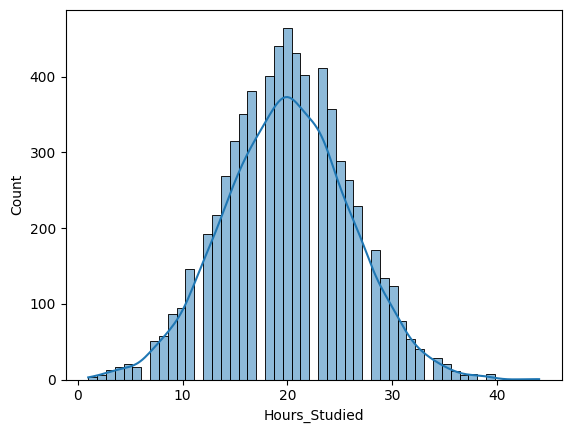

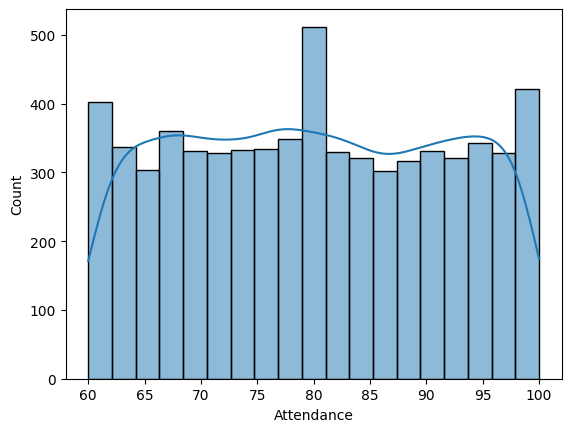

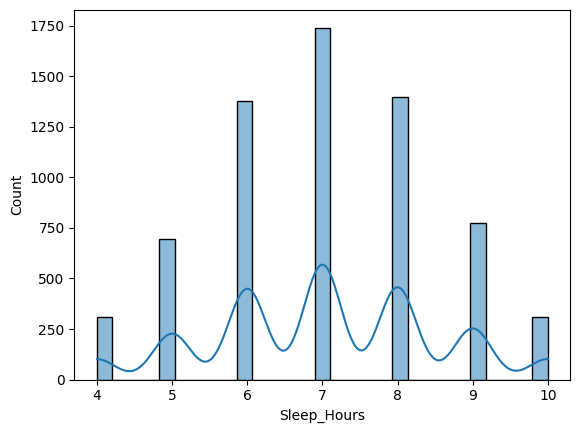

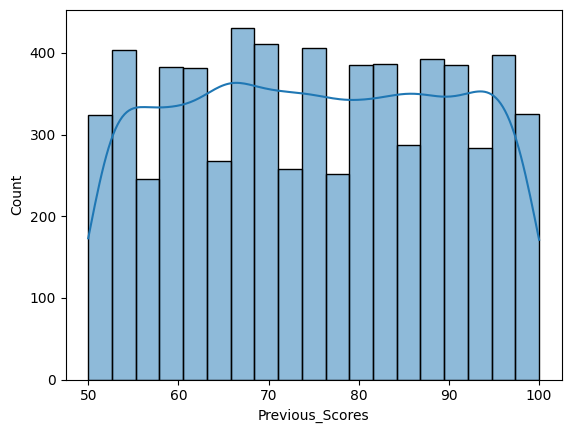

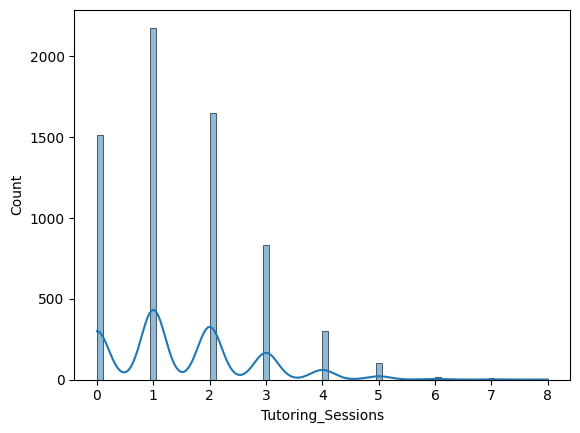

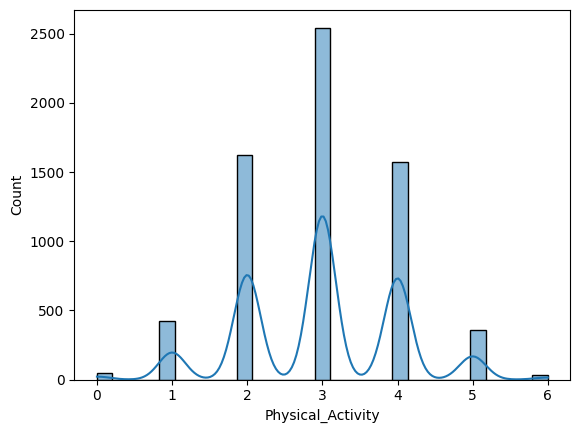

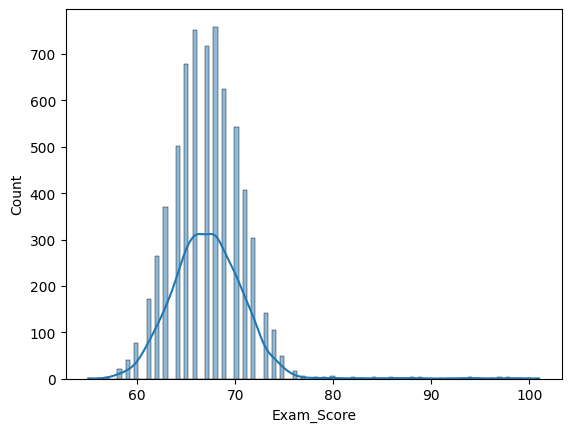

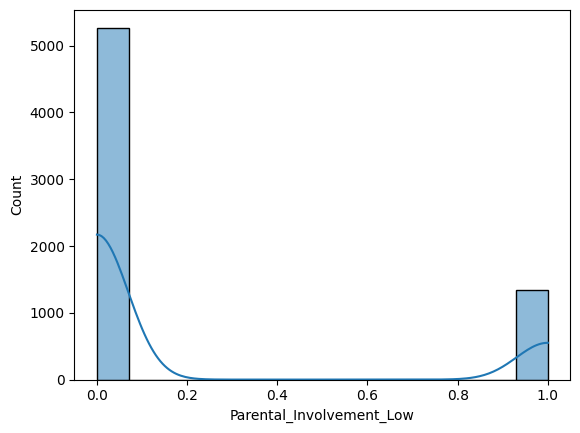

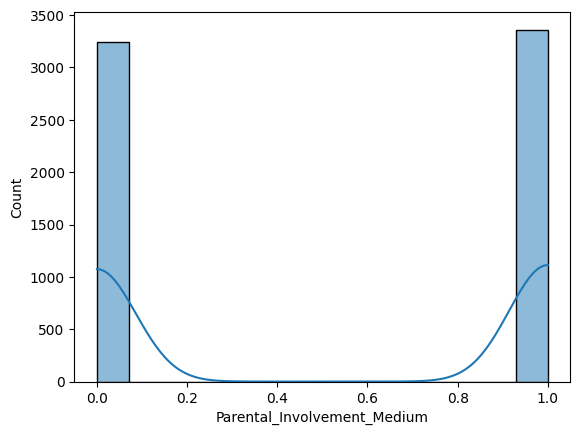

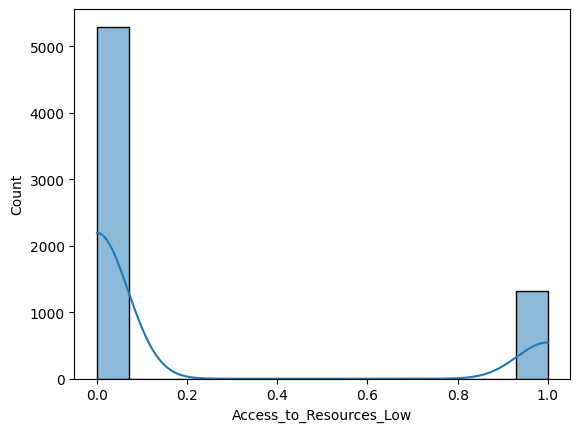

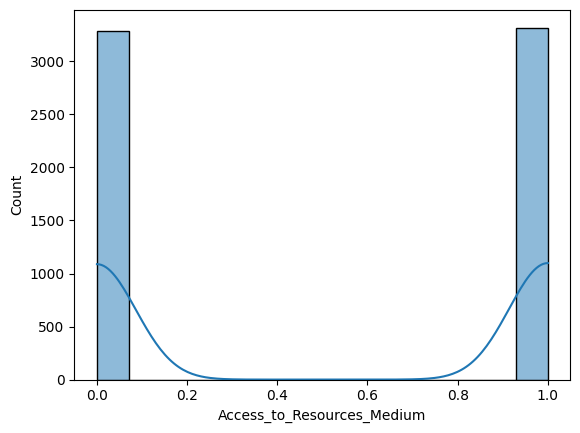

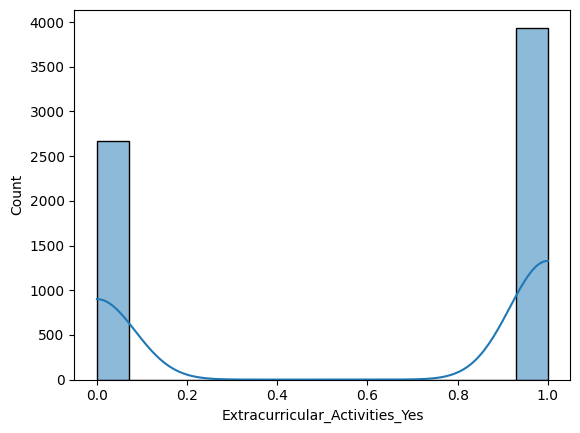

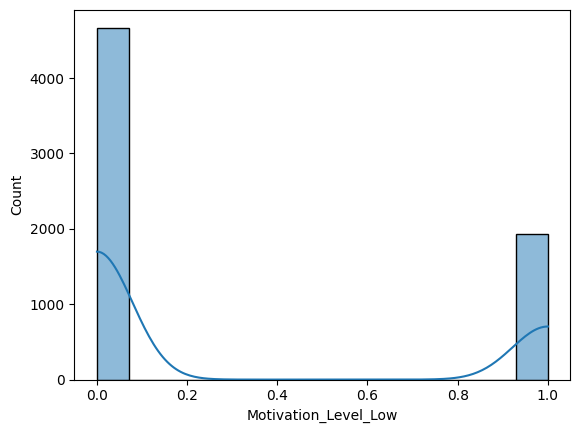

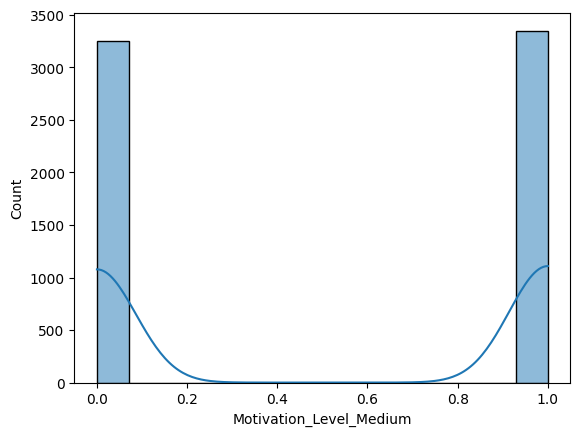

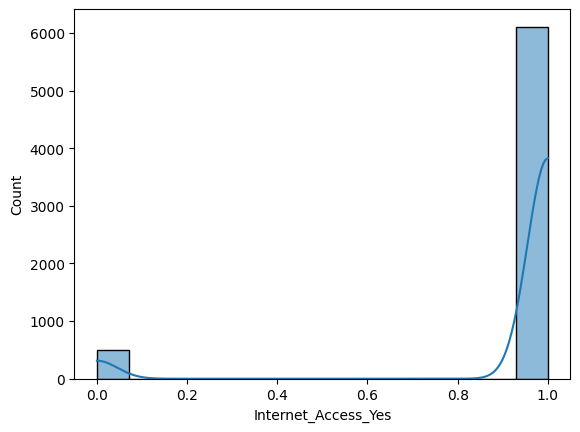

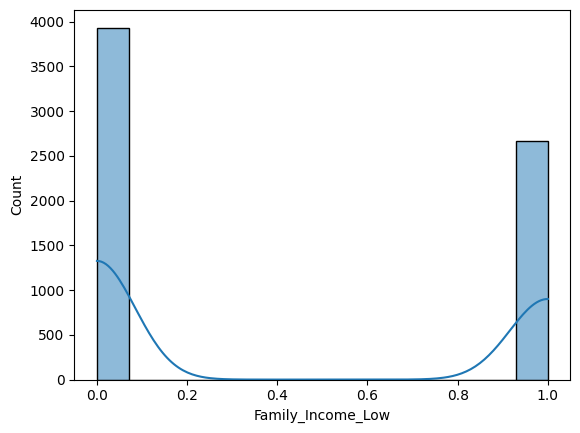

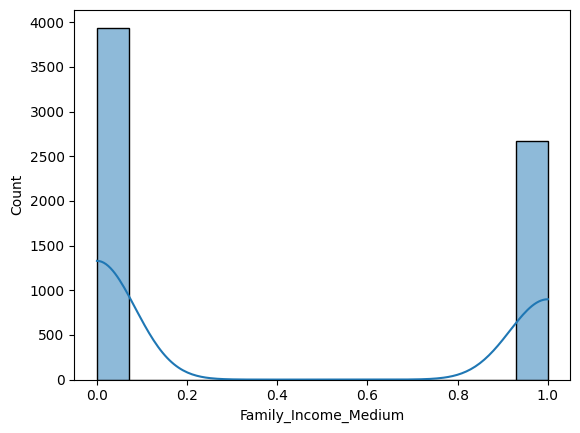

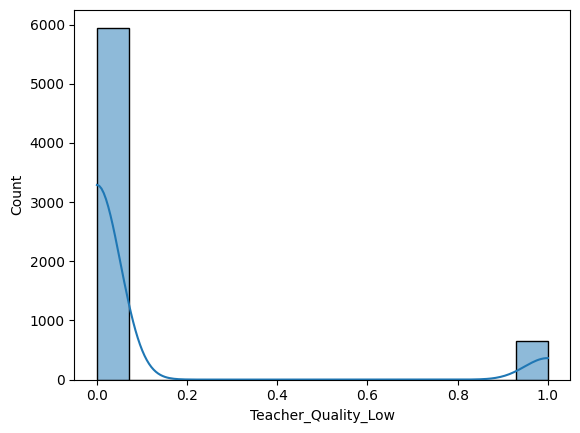

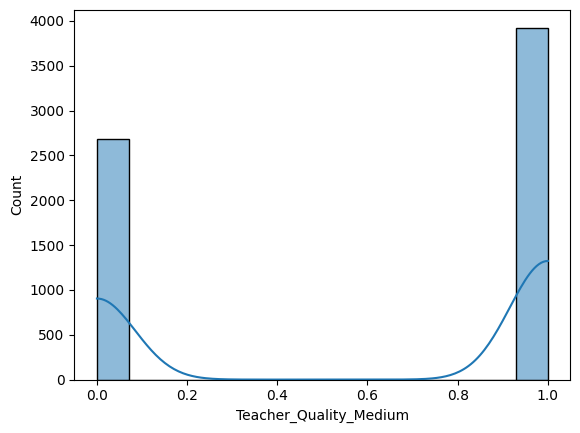

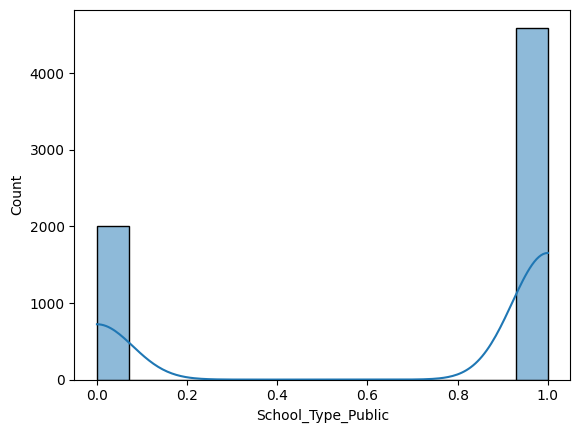

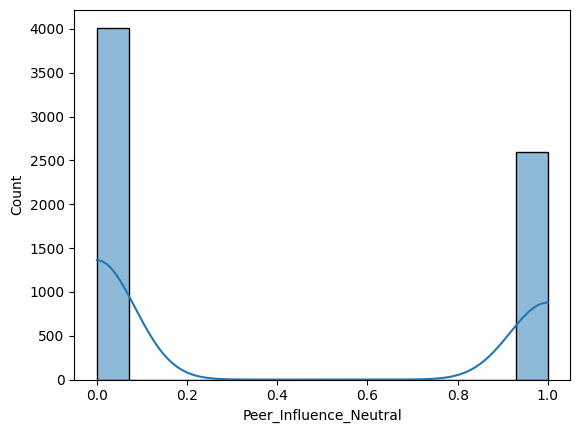

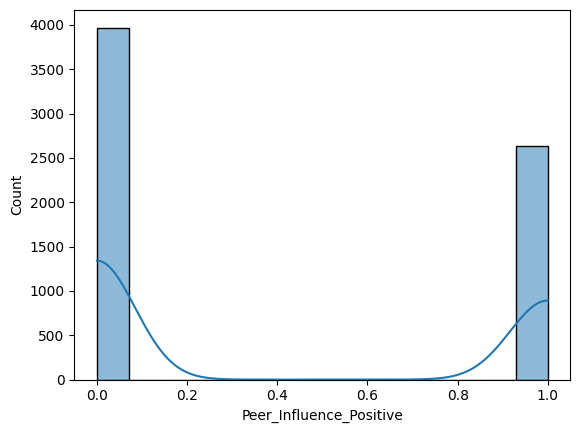

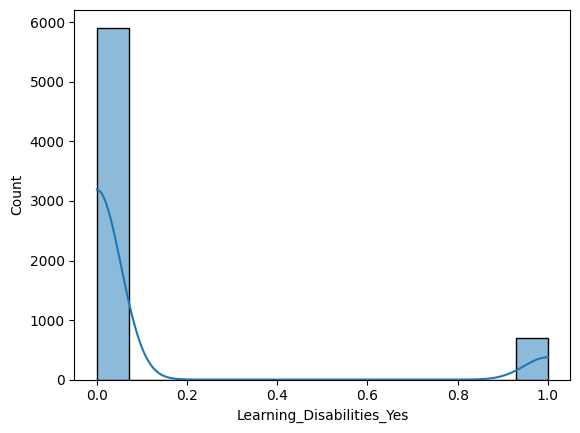

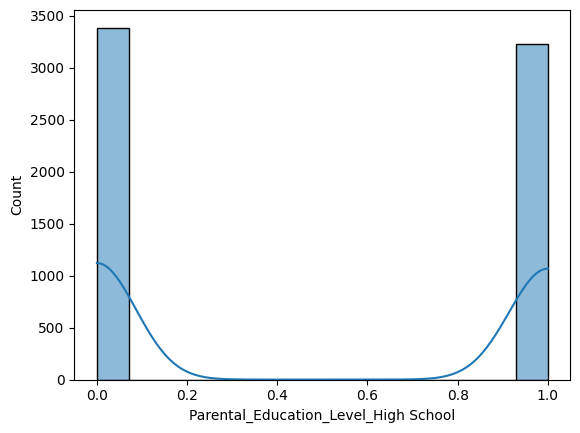

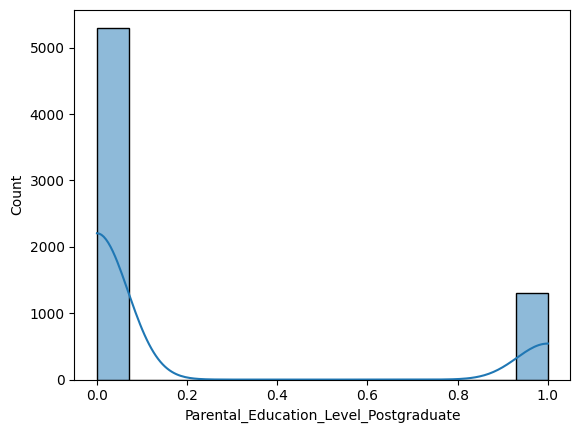

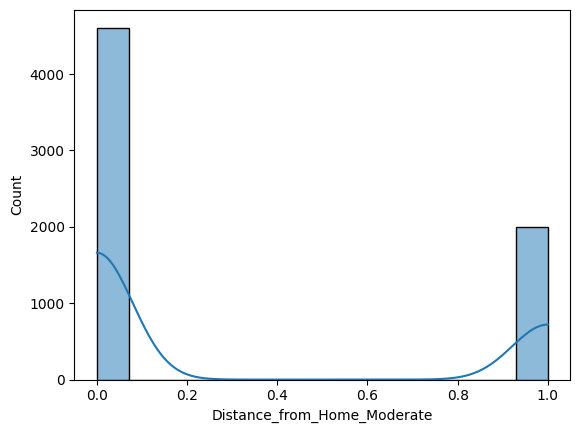

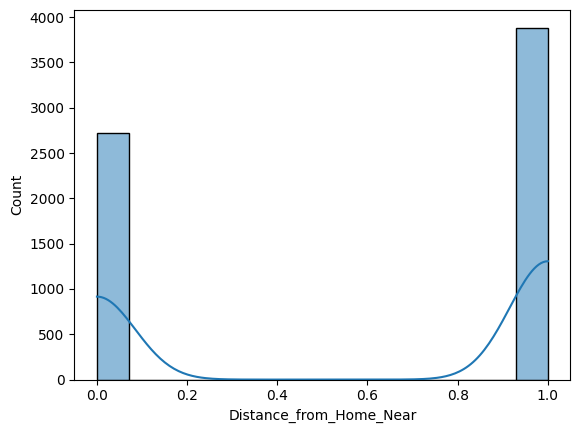

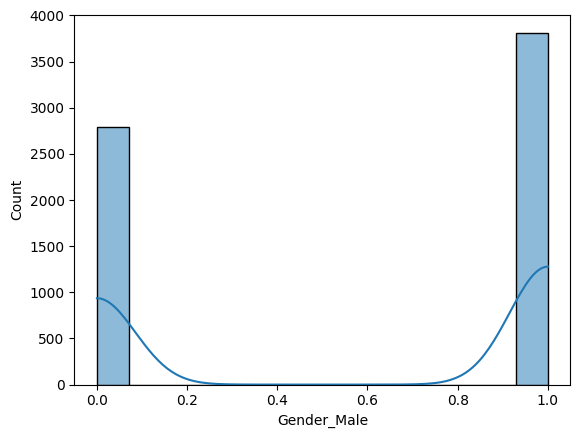

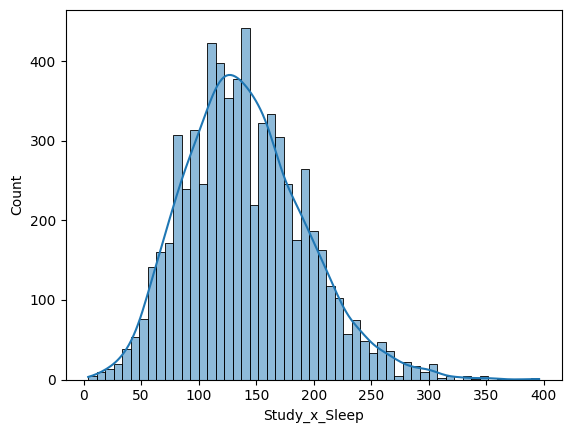

In [26]:
# Distribution of numerical columns
for col in df:
    if df[col].dtype != 'O':
        sns.histplot(df[col],kde=True)
        plt.show()

<Figure size 800x800 with 0 Axes>

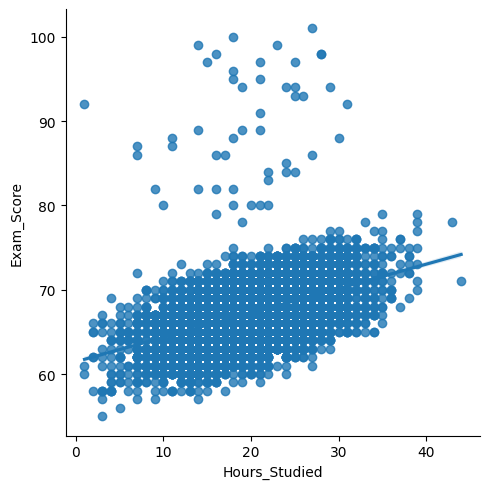

In [27]:
# Hours Studied vs Exam Score
plt.figure(figsize=(8,8))
sns.lmplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.show()

In [8]:
# Feature Engineering
df['Study_x_Sleep'] = df['Hours_Studied'] * df['Sleep_Hours']
if 'Previous_Scores' in df.columns and 'Motivation_Level_High' in df.columns:
    df['Motivation_Score'] = df['Previous_Scores'] * df['Motivation_Level_High']

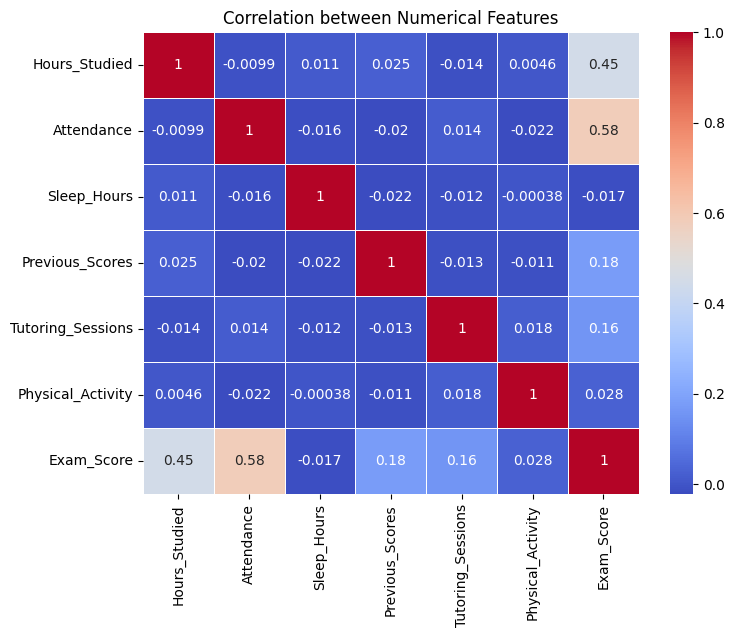

In [9]:
# Correlation heatmap

numeric_features = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours',
    'Previous_Scores', 'Tutoring_Sessions',
    'Physical_Activity', 'Exam_Score'
]

corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Numerical Features')
plt.show()

In [12]:
# Feature Scaling
scaler = StandardScaler()
X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']
X_scaled = scaler.fit_transform(X)

## Data splitting

In [32]:
# Removing outliers
z = np.abs((df - df.mean()) / df.std())
threshold = 3
df_no_outliers = df[(z < threshold).all(axis=1)]

# Data Splitting
X = df_no_outliers.drop(columns=['Exam_Score'])
y = df_no_outliers['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training 

In [35]:
lr_no_outliers = LinearRegression()
lr_no_outliers.fit(X_train, y_train)

LinearRegression()

## Evaluation

In [39]:
lr_preds = lr_no_outliers.predict(X_test)

mse_no_outliers = mean_squared_error(y_test, lr_preds)
r2_no_outliers = r2_score(y_test, lr_preds)

print("\nLinear Regression After Removing Outliers:")
print(f"MSE: {mse_no_outliers: }")
print(f"R² Score: {r2_no_outliers: }")


Linear Regression After Removing Outliers:
MSE:  0.3465319831758912
R² Score:  0.9665522414202463


## Bonus Section - Polynomial Regression

In [41]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Train the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_preds = poly_model.predict(X_test_poly)

# Evaluate the model
poly_mse = mean_squared_error(y_test, poly_preds)
poly_r2 = r2_score(y_test, poly_preds)

print(f"Polynomial Regression MSE (after removing outliers): {poly_mse:}")
print(f"Polynomial Regression R² (after removing outliers): {poly_r2:}")

Polynomial Regression MSE (after removing outliers): 0.3562045382337461
Polynomial Regression R² (after removing outliers): 0.9656186326853196


##  Summary and Conclusion

In [47]:
# Evaluate Linear Regression
linear_pred = linear_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

# Print both model results
print(f"Linear Regression MSE : {linear_mse:.4f}")
print(f"Polynomial Regression MSE : {poly_mse:.4f}")
print(f"Linear Regression R² Score : {linear_r2:.4f}")
print(f"Polynomial Regression R² Score : {poly_r2:.4f}")

Linear Regression MSE : 0.3465
Polynomial Regression MSE : 0.3562
Linear Regression R² Score : 0.9666
Polynomial Regression R² Score : 0.9656


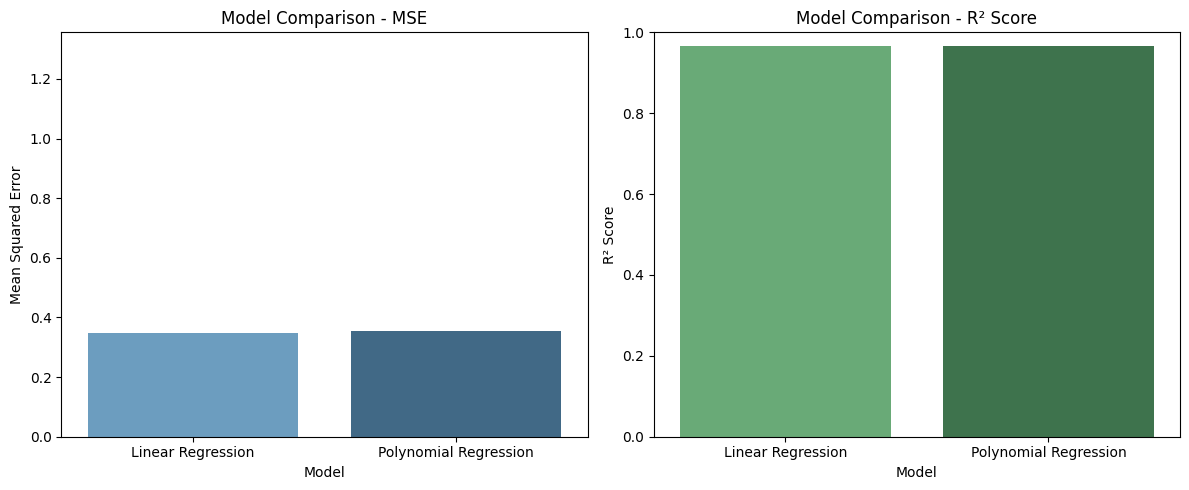

In [48]:
# Comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'MSE': [linear_mse, poly_mse],
    'R² Score': [linear_r2, poly_r2]
})

plt.figure(figsize=(12, 5))

# MSE
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=comparison_df, palette='Blues_d')
plt.title('Model Comparison - MSE')
plt.ylabel('Mean Squared Error')
plt.ylim(0, max(comparison_df['MSE']) + 1)

# R2
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R² Score', data=comparison_df, palette='Greens_d')
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()
